In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt 
from sympy import *

Задание 2.6.3
Найдите OLS оценку для коэффициентов w1, w2 СЛАУ

<img src="https://lms.skillfactory.ru/assets/courseware/v1/383591e2497d4aa53bf3b92b3c5acdf5/asset-v1:Skillfactory+DST-PRO+15APR2020+type@asset+block/MAT_unit_2_013.jpg" width="300px">

a) Вычислите матрицу Грама столбцов А: ATA =

In [ ]:
# create a matrix A
A = np.array([[1,2],[-3,1],[1,2],[1,-1]])

# create a vector b

b = np.array([[1],[4],[5],[0]])

Gram = A.T@A
print(f'Matrix Gram: {Gram}')
print('')

# finf inverse matrix of Gram M
Gram_inv = np.linalg.inv(Gram)
print(f'Inverted Matrix Gram: {Gram_inv}')
print('')


Задание 2.6.3_3

A.T@b

In [ ]:
ATb=A.T@b

In [ ]:
# find coordinastes of vector w
w_=Gram_inv@ATb 
w_

In [ ]:
# Option 2


# vector b
b = np.array([[1],[4],[5],[0]])

# matrix A
A = np.array([[1,2],[-3,1],[1,2],[1,-1]])


# find vector Ax (projection of vector b)
x = np.linalg.solve(A.T@A,A.T@b)
Ax = A@x

print(f'Vector b {b.T}')
print(f'Projection: {Ax.T}')
# Magnitude of vector projected vector Ax
print(f'Magnitide of projected vector: {np.linalg.norm(Ax)}')

In [ ]:
# coordinates of vector the orthogonal to Ax vector (i.e error vector)
err = b-Ax
print(err)
# length orthogonal to Ax vector
print(np.linalg.norm(err))

In [ ]:
Ax

In [ ]:
# make some random matrices (using sympy package)
A = Matrix(np.array([[1,2],[-3,1],[1,-1]]) )

# compute RREF
rrefA = A.rref()

# print out the matrix and its rref
print(np.array(rrefA[0]))
print(' ')

In [2]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [8]:
X = df.drop('Serial No.', axis=1)
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [6]:
corr = X.corr(method='pearson')

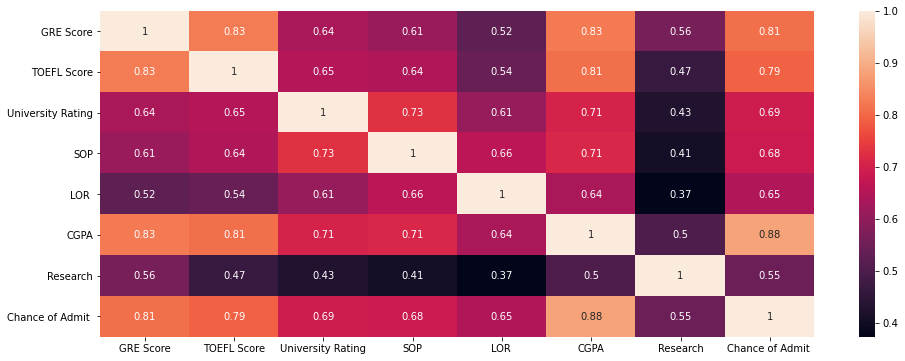

In [7]:
plt.figure(figsize=(16,6)) # размер графика
sns.heatmap(data=corr, annot=True)

In [12]:
DF1 = df[df['Research']==1]
DF2 = df[df['Research']==0]

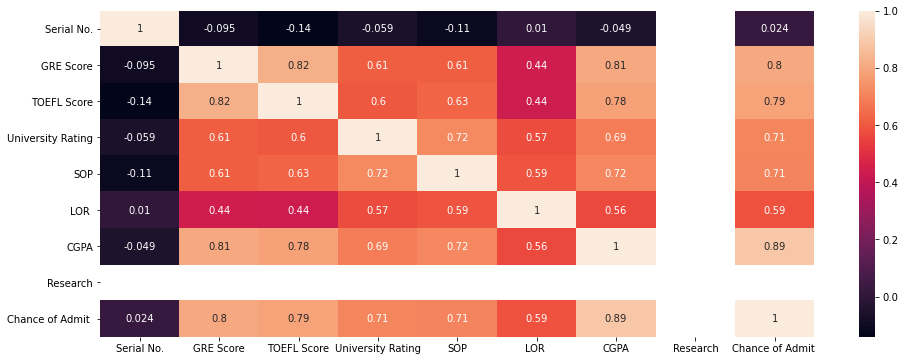

In [15]:
corr1 = DF1.corr(method='pearson')
plt.figure(figsize=(16,6)) # размер графика
sns.heatmap(data=corr1, annot=True)

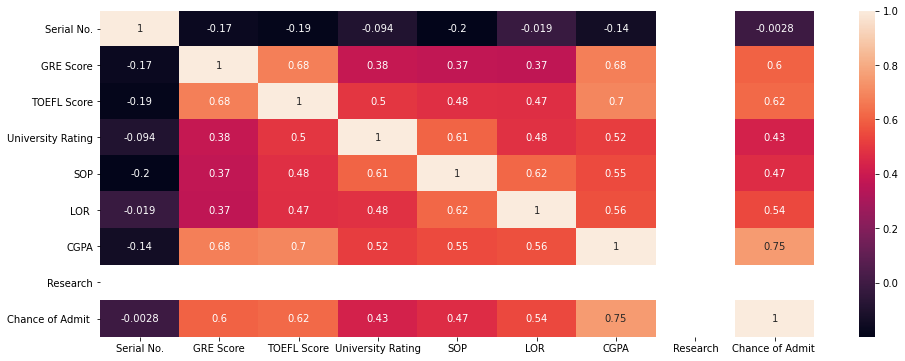

In [16]:
corr2 = DF2.corr(method='pearson')
plt.figure(figsize=(16,6)) # размер графика
sns.heatmap(data=corr2, annot=True)

Постройте OLS регрессию Chance of Admission на выбранные в предыдущей задаче признаки без стандартизации. Используйте данные для соискателей, у которых нет исследований (Research == 0). Признаки запишите в матрицу данных в том порядке, в котором они представлены в DataFrame.

In [46]:
data = DF2[['TOEFL Score','CGPA']].values

In [47]:
y = DF2['Chance of Admit '].values # independent var
N = len(data) #intercept
X = np.column_stack((np.ones(N),data)) # Design matrix

In [48]:
beta = np.linalg.solve(X.T@X,X.T@y)

In [50]:
np.round(beta,3)


array([-1.045,  0.004,  0.148])

Сделайте прогноз шансов поступления в университет для абитуриента с TOEFL Score=107, CGPA=9.1, используя модель, полученную в задаче 2.11.6 (используйте округленные значения признаков).

In [51]:
toefl = 107
CGPA = 9.1

chance_1 = beta[0] + beta[1]*toefl + beta[2]*CGPA

In [53]:
round(chance_1,2)

0.78

In [54]:
chance_1 = -1.045 + 0.004*toefl + 0.148*CGPA

In [55]:
chance_1

0.7297999999999998

Аналогично задаче 2.11.6 постройте OLS регрессию Chance of Admission на выбранные в задаче 2.11.5 признаки, однако теперь сперва стандартизируйте эти признаки.

In [62]:
mean_toefl = DF2['TOEFL Score'].mean()
mean_CGPA = DF2['CGPA'].mean()
mean_y = y.mean()

In [65]:
# Центрирование

TOEFL_c = DF2['TOEFL Score'] - mean_toefl
CGPA_c = DF2['CGPA'] - mean_CGPA
y_c = y-mean_y

In [66]:
# Vector lenght

TOEFL_c_n = np.linalg.norm(TOEFL_c)
CGPA_c_n = np.linalg.norm(CGPA_c)
y_c_n = np.linalg.norm(y_c)

In [68]:
TOEFL_st = TOEFL_c/TOEFL_c_n
CGPA_st = CGPA_c/CGPA_c_n
y_st = y_c/y_c_n

In [71]:
X_st=np.column_stack((TOEFL_st,CGPA_st))

In [73]:
beta = np.linalg.solve(X_st.T@X_st,X_st.T@y_st)

In [74]:
np.round(beta,2)

array([0.19, 0.62])